In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import konlpy
from konlpy.tag import Okt
import re

In [2]:
from collections import Counter

In [42]:
file_name = 'news_20100616_20200612'

In [43]:
df = pd.read_excel(file_name+".xlsx")

In [44]:
df.head()

,created_dt,title,content,entities
0,2020-06-12,"코스피, 뉴욕증시 충격에 2%대 하락…삼성전자 3.68%↓","코스피가 외국인과 기관이 동반 순매도하며 2% 넘게 하락, 2130선으로 미끄러졌다...","[{'type': 'company', 'name': 'KB금융'}, {'type':..."
1,2020-06-12,KT 이어 SKT도 2G 서비스 폐지…01X 이용자 보상안은,"LTE 무료 단말 10종…내년 6월까진 01X 이용 가능 \nLGU+ ""2G용 주파...","[{'type': 'company', 'name': 'KT'}, {'type': '..."
2,2020-06-12,"SKT, 2G 서비스 단계적 중단…'011'번호 사라진다",011과 017 등으로 시작하는 SK텔레콤의 2G 이동통신 서비스가 종료된다.\n\...,"[{'type': 'company', 'name': 'SK텔레콤'}]"
3,2020-06-12,셀트리온 빼고 모두 '파란불'…SK하이닉스·LG화학 4%↓,코스피가 3% 넘게 급락하는 가운데 시총 상위주 대부분이 약세다. \n\n12일 9...,"[{'type': 'company', 'name': 'LG생활건강'}, {'type..."
4,2020-06-12,"[특징주] 코스피 시총 상위주, 일제히 ‘급락’…삼성전자 4%대 약세",코스피 시가총액 상위 종목이 장 초반 일제히 약세를 보이고 있다.\n\n12일 오전...,"[{'type': 'company', 'name': 'LG생활건강'}, {'type..."


In [45]:
len(df)

16819

In [46]:
from konlpy.tag import Okt

def noun_verb(_x):
    try:
        okt = Okt()

        okt_morphs = okt.pos(_x)  # 튜플반환
        temp_x = []
        for word, pos in okt_morphs:
            if pos == 'Noun' or pos == 'Verb':
                temp_x.append(word)
        c = Counter(temp_x).most_common()
        return c
    except:
        return np.nan

In [47]:
df['content_noun_verb'] = df['content'].apply(lambda x: noun_verb(x))
df['title_noun_verb'] = df['title'].apply(lambda x: noun_verb(x))

In [48]:
df.head()

,created_dt,title,content,entities,content_noun_verb,title_noun_verb
0,2020-06-12,"코스피, 뉴욕증시 충격에 2%대 하락…삼성전자 3.68%↓","코스피가 외국인과 기관이 동반 순매도하며 2% 넘게 하락, 2130선으로 미끄러졌다...","[{'type': 'company', 'name': 'KB금융'}, {'type':...","[(했다, 11), (하락, 9), (넘게, 5), (지수, 5), (기관, 4),...","[(코스피, 1), (뉴욕증시, 1), (충격, 1), (대, 1), (하락, 1)..."
1,2020-06-12,KT 이어 SKT도 2G 서비스 폐지…01X 이용자 보상안은,"LTE 무료 단말 10종…내년 6월까진 01X 이용 가능 \nLGU+ ""2G용 주파...","[{'type': 'company', 'name': 'KT'}, {'type': '...","[(서비스, 12), (할, 9), (종료, 7), (등, 7), (망, 7), (...","[(이어, 1), (도, 1), (서비스, 1), (폐지, 1), (이용자, 1),..."
2,2020-06-12,"SKT, 2G 서비스 단계적 중단…'011'번호 사라진다",011과 017 등으로 시작하는 SK텔레콤의 2G 이동통신 서비스가 종료된다.\n\...,"[{'type': 'company', 'name': 'SK텔레콤'}]","[(등, 4), (가입자, 4), (수, 4), (망, 4), (과, 3), (하는...","[(서비스, 1), (단계, 1), (중단, 1), (번호, 1), (사라진다, 1)]"
3,2020-06-12,셀트리온 빼고 모두 '파란불'…SK하이닉스·LG화학 4%↓,코스피가 3% 넘게 급락하는 가운데 시총 상위주 대부분이 약세다. \n\n12일 9...,"[{'type': 'company', 'name': 'LG생활건강'}, {'type...","[(급락, 3), (약세, 3), (현재, 3), (지수, 3), (코스피, 2),...","[(셀트리온, 1), (빼고, 1), (모두, 1), (파란, 1), (불, 1),..."
4,2020-06-12,"[특징주] 코스피 시총 상위주, 일제히 ‘급락’…삼성전자 4%대 약세",코스피 시가총액 상위 종목이 장 초반 일제히 약세를 보이고 있다.\n\n12일 오전...,"[{'type': 'company', 'name': 'LG생활건강'}, {'type...","[(지수, 3), (코스피, 2), (장, 2), (보이, 2), (삼성, 2), ...","[(특징, 1), (주, 1), (코스피, 1), (총, 1), (상, 1), (위..."


In [49]:
df = df[['created_dt','title', 'title_noun_verb', 'content', 'content_noun_verb', 'entities']]

In [50]:
df.head()

,created_dt,title,title_noun_verb,content,content_noun_verb,entities
0,2020-06-12,"코스피, 뉴욕증시 충격에 2%대 하락…삼성전자 3.68%↓","[(코스피, 1), (뉴욕증시, 1), (충격, 1), (대, 1), (하락, 1)...","코스피가 외국인과 기관이 동반 순매도하며 2% 넘게 하락, 2130선으로 미끄러졌다...","[(했다, 11), (하락, 9), (넘게, 5), (지수, 5), (기관, 4),...","[{'type': 'company', 'name': 'KB금융'}, {'type':..."
1,2020-06-12,KT 이어 SKT도 2G 서비스 폐지…01X 이용자 보상안은,"[(이어, 1), (도, 1), (서비스, 1), (폐지, 1), (이용자, 1),...","LTE 무료 단말 10종…내년 6월까진 01X 이용 가능 \nLGU+ ""2G용 주파...","[(서비스, 12), (할, 9), (종료, 7), (등, 7), (망, 7), (...","[{'type': 'company', 'name': 'KT'}, {'type': '..."
2,2020-06-12,"SKT, 2G 서비스 단계적 중단…'011'번호 사라진다","[(서비스, 1), (단계, 1), (중단, 1), (번호, 1), (사라진다, 1)]",011과 017 등으로 시작하는 SK텔레콤의 2G 이동통신 서비스가 종료된다.\n\...,"[(등, 4), (가입자, 4), (수, 4), (망, 4), (과, 3), (하는...","[{'type': 'company', 'name': 'SK텔레콤'}]"
3,2020-06-12,셀트리온 빼고 모두 '파란불'…SK하이닉스·LG화학 4%↓,"[(셀트리온, 1), (빼고, 1), (모두, 1), (파란, 1), (불, 1),...",코스피가 3% 넘게 급락하는 가운데 시총 상위주 대부분이 약세다. \n\n12일 9...,"[(급락, 3), (약세, 3), (현재, 3), (지수, 3), (코스피, 2),...","[{'type': 'company', 'name': 'LG생활건강'}, {'type..."
4,2020-06-12,"[특징주] 코스피 시총 상위주, 일제히 ‘급락’…삼성전자 4%대 약세","[(특징, 1), (주, 1), (코스피, 1), (총, 1), (상, 1), (위...",코스피 시가총액 상위 종목이 장 초반 일제히 약세를 보이고 있다.\n\n12일 오전...,"[(지수, 3), (코스피, 2), (장, 2), (보이, 2), (삼성, 2), ...","[{'type': 'company', 'name': 'LG생활건강'}, {'type..."


In [51]:
df.to_excel(file_name+'_revised.xlsx', index=False)

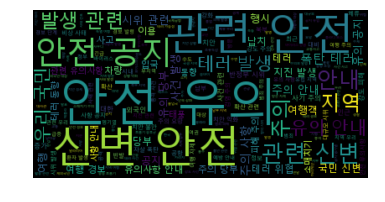

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in title_noun_list:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


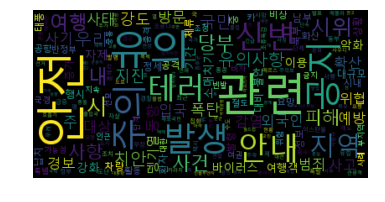

In [24]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate_from_frequencies(frequencies=c)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

